In [1]:
include("./param.jl");
include("./aux_functions.jl");

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/dimitrios/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f21ec93a843, Ptr{Nothing} @0x00007f21ec9c717c, Ptr{Nothing} @0x00007f21ec9c773b, Ptr{Nothing} @0x00007f21ec9c7389, Ptr{Nothing} @0x00007f21ec9c78f0, Ptr{Nothing} @0x00007f21ec9c89c8, Ptr{Nothing} @0x00007f21ec9c9616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f21ec9e1e08, Ptr{Nothing} @0x00007f21ec9e278e, Ptr{Nothing} @0x00007f21ec9e213a, Ptr{Nothing} @0x00007f21ec9e23c8, Ptr{Nothing} @0x00007f21ec9bd105, Ptr{Nothing} @0x00007f21ec9e315d, Ptr{Nothing} @0x00007f21dec7efa1, Ptr{Nothing} @0x00007f21a52e012c, Ptr{Nothing} @0x00007f21ec9c775b, Ptr{Nothing} @0x00007f21ec9c7389, Ptr{Nothing} @0x00007f21ec9c78f0, Ptr{Nothing} @0x00007f21ec9c89c8, Ptr{Nothing} @0x00007f21ec9c9616, Base.InterpreterI

In [2]:
using Main.aux_functions
using Main.param

In [3]:
using ADCME
using SparseArrays

using DelimitedFiles
using Dates
using Plots

In [4]:
Dates.format(now(), "HH:MM") 

"22:31"

In [5]:
param_model_val = param_model(N_steps=600);
tf_variables, h_t, q_t_x, q_t_y = Darcy_flow_solver(param_model_val);

In [6]:
k_x, k_y = param.load_K_s(param_model_val)

([0.04586718291384128, 0.046338397114360094, 0.04678979615026386, 0.04720903541341705, 0.047588938616224805, 0.04795865036388325, 0.04831587120378633, 0.04865358637066553, 0.04897567097529809, 0.04930382818857029  …  0.11431656523675568, 0.11431322906679736, 0.11431774976476262, 0.11431772651840164, 0.11431439031455332, 0.11432224730797826, 0.11431888782364145, 0.11431671288084448, 0.11432340867094072, 0.114320049152476], [0.006989783376535274, 0.006637092005511772, 0.006363350583205923, 0.006133691332780854, 0.00594613171015112, 0.005766743015150412, 0.005602607031459307, 0.00544582809359381, 0.005306864055674096, 0.005172828621523682  …  0.003183753932196078, 0.0031821466061349763, 0.003183841535220122, 0.003183785765278769, 0.0031821625146409975, 0.0031821784233059, 0.0031838016820590143, 0.0031821943321298676, 0.0031821943321298676, 0.003183817598998221])

In [7]:
loss, opt_ADAM, opt_LFGS, opt_ADAM_sum, opt_LFGS_sum, diff_eval,p_pre_soft_max, p = Info_upscale(tf_variables,param_model_val,q_t_x, q_t_y,50)

2.830469177224561e-5/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-pa

(PyObject <tf.Tensor 'add_72:0' shape=() dtype=float64>, PyObject <tf.Operation 'Adam' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f20f3b70d90>, PyObject <tf.Operation 'Adam_1' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f20f0706d50>, PyObject <tf.Tensor 'Max_1:0' shape=() dtype=float64>, PyObject <tf.Variable 'Variable_3:0' shape=(1, 64) dtype=float64_ref>, PyObject <tf.Tensor 'Softmax:0' shape=(1, 64) dtype=float64>)

In [8]:
sess = Session(); init(sess);


2021-05-13 22:31:39.146726: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-05-13 22:31:39.182493: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2021-05-13 22:31:39.183016: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b8208de790 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-13 22:31:39.183233: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-05-13 22:31:39.188300: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-13 22:31:39.271485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-13

In [9]:
N_k_dis_ = 4
T_exp = -2
T_=  10.0 .^ -T_exp


100.0

In [19]:
check = run(sess,q_t_x)

9-element Array{Array{Float64,3},1}:
 [6.53275521259131e-5 6.524418753250072e-5 … 6.537597542563752e-5 6.535765858325598e-5; 6.473391239377524e-5 6.467195708233635e-5 … 6.475837639818978e-5 6.471480711060614e-5; … ; 0.00013111085092139645 0.00013097352916434388 … 0.0001313411867954878 0.0001316240393290693; 0.00013142531055630085 0.0001312363937614644 … 0.00013146929774708415 0.00013165343676844]
 [6.532753350829563e-5 6.524416881170809e-5 … 6.537595673829613e-5 6.535764002912234e-5; 6.40161856057008e-5 6.395547261765673e-5 … 6.403372050060804e-5 6.399268689362863e-5; … ; 0.00013109917824367562 0.00013096175192294017 … 0.00013132915056246074 0.00013161201986134095; 0.00013141362810922526 0.00013122467418308454 … 0.00013145735022157483 0.0001316413966505879]
 [6.532751489067814e-5 6.524415009091547e-5 … 6.537593805095475e-5 6.535762147498872e-5; 6.358559209675122e-5 6.35256167673196e-5 … 6.359905113078756e-5 6.355950884070611e-5; … ; 0.0001310884632023363 0.00013095094201130643 … 0.0001

In [17]:
run(sess,opt_ADAM_sum,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>8))

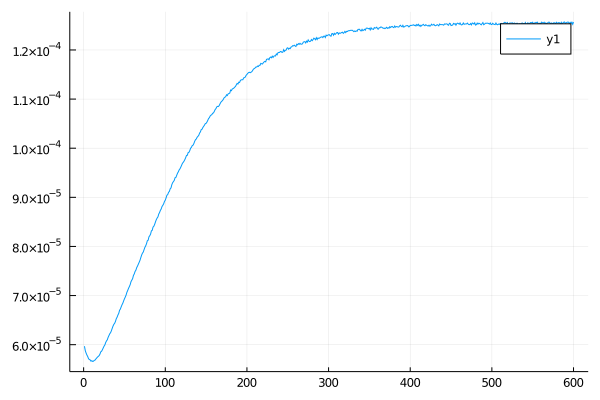

In [20]:
plot(check[5][:,4,1])
# plot(check[5][:,2,1])

In [15]:
ScipyOptimizerMinimize(sess, opt_LFGS_sum,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>8))


In [8]:
save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p,"w")

print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
ScipyOptimizerMinimize(sess, opt_LFGS_sum,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>8))
print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)

check_diff = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))

-2	100.0	0.009649301956094317	5.763548660295008		4
-2	100.0	0.0044934808496536124	7.693269095329374		4


0.0044934808496536124

In [11]:
check[5]

600×64×1 Array{Float64,3}:
[:, :, 1] =
 2.75771e-6  2.75769e-6  2.75765e-6  …  2.75767e-6  2.75772e-6  2.75773e-6
 1.11683e-6  1.11686e-6  1.11686e-6     1.11686e-6  1.11685e-6  1.11685e-6
 1.03245e-6  1.03242e-6  1.03244e-6     1.03244e-6  1.03242e-6  1.03242e-6
 9.62785e-7  9.62776e-7  9.62777e-7     9.62784e-7  9.62799e-7  9.6278e-7
 9.02877e-7  9.02846e-7  9.02861e-7     9.0287e-7   9.02853e-7  9.02847e-7
 8.51288e-7  8.5129e-7   8.51292e-7  …  8.51283e-7  8.51279e-7  8.5128e-7
 8.06888e-7  8.06891e-7  8.06893e-7     8.06894e-7  8.06879e-7  8.06878e-7
 7.68653e-7  7.68659e-7  7.6868e-7      7.68653e-7  7.68673e-7  7.68675e-7
 7.35788e-7  7.35771e-7  7.35773e-7     7.35777e-7  7.35786e-7  7.3577e-7
 7.07474e-7  7.07476e-7  7.07475e-7     7.07454e-7  7.07453e-7  7.07478e-7
 6.83089e-7  6.83099e-7  6.83104e-7  …  6.83103e-7  6.83101e-7  6.83093e-7
 6.62118e-7  6.62131e-7  6.62128e-7     6.62131e-7  6.62139e-7  6.62118e-7
 6.4408e-7   6.44067e-7  6.4408e-7      6.44065e-7  6.44084e-7  

In [9]:
  T_exp_final =0




0

In [10]:

while T_exp <= T_exp_final

    T_=  10.0 ^ (-T_exp) 

    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    ScipyOptimizerMinimize(sess, opt_LFGS,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))
    print_status(sess,loss,diff_eval,T_exp,T_,N_k_dis_,tf_variables)
    if round(T_exp,digits=2)%1 == 0

        save_values(sess,param_model_val,tf_variables,q_t_x, q_t_y,p)
        check_diff_ = run(sess,diff_eval,feed_dict = Dict(tf_variables.lambda => ones(1)*T_,tf_variables.N_k_dis=>N_k_dis_))  
        N_k_dis_ = update_K_p(sess,param_model_val,tf_variables,check_diff_,N_k_dis_,p_pre_soft_max)

    end


    T_exp += 0.1
end


-2	100.0	0.0044934808496536124	7.693269095329374		4
-2